In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
# === Шаг 1. Загрузка данных ===
data = pd.read_csv("dataset/winequality-red.csv", sep=',', skipinitialspace=True)
D1 = data.drop(columns=['quality'])

In [5]:
# === Шаг 2. Масштабирование данных ===
scaler = StandardScaler()
D1_scaled = scaler.fit_transform(D1)

In [6]:
# === Шаг 3. Снижение размерности ===
# PCA → D2
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1_scaled)

# t-SNE → D3
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
D3 = tsne.fit_transform(D1_scaled)

# Получим самые важные признаки для PC1 и PC2 (по абсолютному весу)
def get_top_features_for_pc(pca, features, n=2):
    top_features_pc1 = np.abs(pca.components_[0]).argsort()[::-1][:n]
    top_features_pc2 = np.abs(pca.components_[1]).argsort()[::-1][:n]
    pc1_names = [features[i] for i in top_features_pc1]
    pc2_names = [features[i] for i in top_features_pc2]
    return pc1_names, pc2_names

pc1_feats, pc2_feats = get_top_features_for_pc(pca, D1.columns)

In [7]:
# === Функция для визуализации кластеров ===
def plot_clusters(X, labels, title, xlabel='Dim 1', ylabel='Dim 2'):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# === Функция для кластеризации и оценки метрик ===
def cluster_and_evaluate(X, method_name):
    print(f"\n##### Кластеризация и метрики для {method_name}: #####")
    
    models = {
        "KMeans": KMeans(n_clusters=3, random_state=42),
        "Agglomerative": AgglomerativeClustering(n_clusters=3),
        "GMM": GaussianMixture(n_components=3, random_state=42)
    }

    for name, model in models.items():
        labels = model.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"\n{name}: кластеров = {n_clusters}")
        
        if n_clusters < 2:
            print("Недостаточно кластеров для метрик.")
            continue

        sil = silhouette_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        db = davies_bouldin_score(X, labels)

        print(f"  Silhouette Score: {sil:.4f}")
        print(f"  Calinski-Harabasz Score: {ch:.2f}")
        print(f"  Davies-Bouldin Score: {db:.2f}")

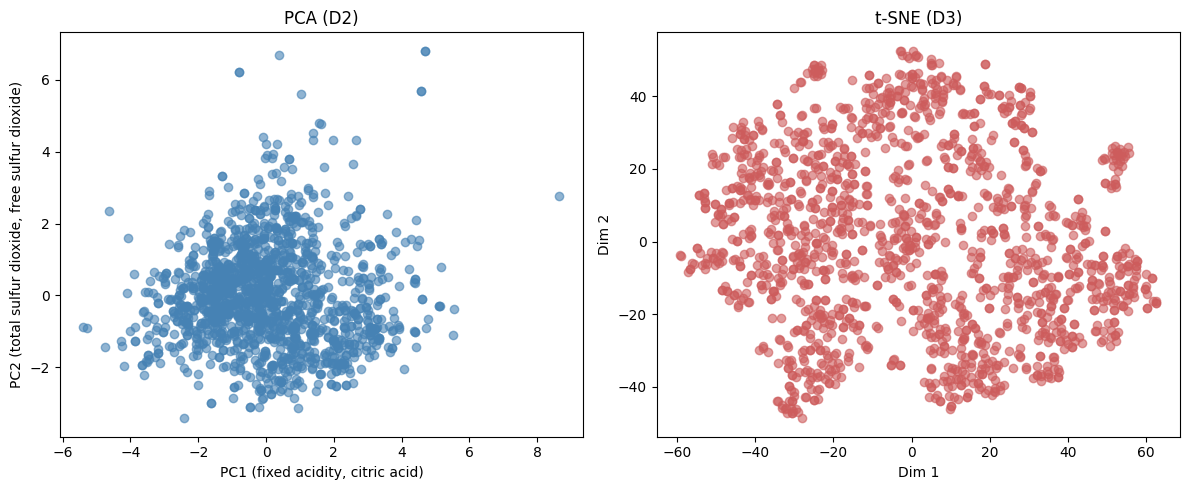

In [8]:
# === Шаг 4. Визуализация снижения размерности (PCA и t-SNE) ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(D2[:, 0], D2[:, 1], c='steelblue', alpha=0.6)
plt.title("PCA (D2)")
plt.xlabel(f"PC1 ({', '.join(pc1_feats)})")
plt.ylabel(f"PC2 ({', '.join(pc2_feats)})")

plt.subplot(1, 2, 2)
plt.scatter(D3[:, 0], D3[:, 1], c='indianred', alpha=0.6)
plt.title("t-SNE (D3)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.tight_layout()
plt.show()


##### Кластеризация и метрики для D1 (исходные признаки): #####

KMeans: кластеров = 3
  Silhouette Score: 0.1892
  Calinski-Harabasz Score: 313.33
  Davies-Bouldin Score: 1.77

Agglomerative: кластеров = 3
  Silhouette Score: 0.1577
  Calinski-Harabasz Score: 265.07
  Davies-Bouldin Score: 1.97

GMM: кластеров = 3
  Silhouette Score: 0.1202
  Calinski-Harabasz Score: 124.30
  Davies-Bouldin Score: 2.65


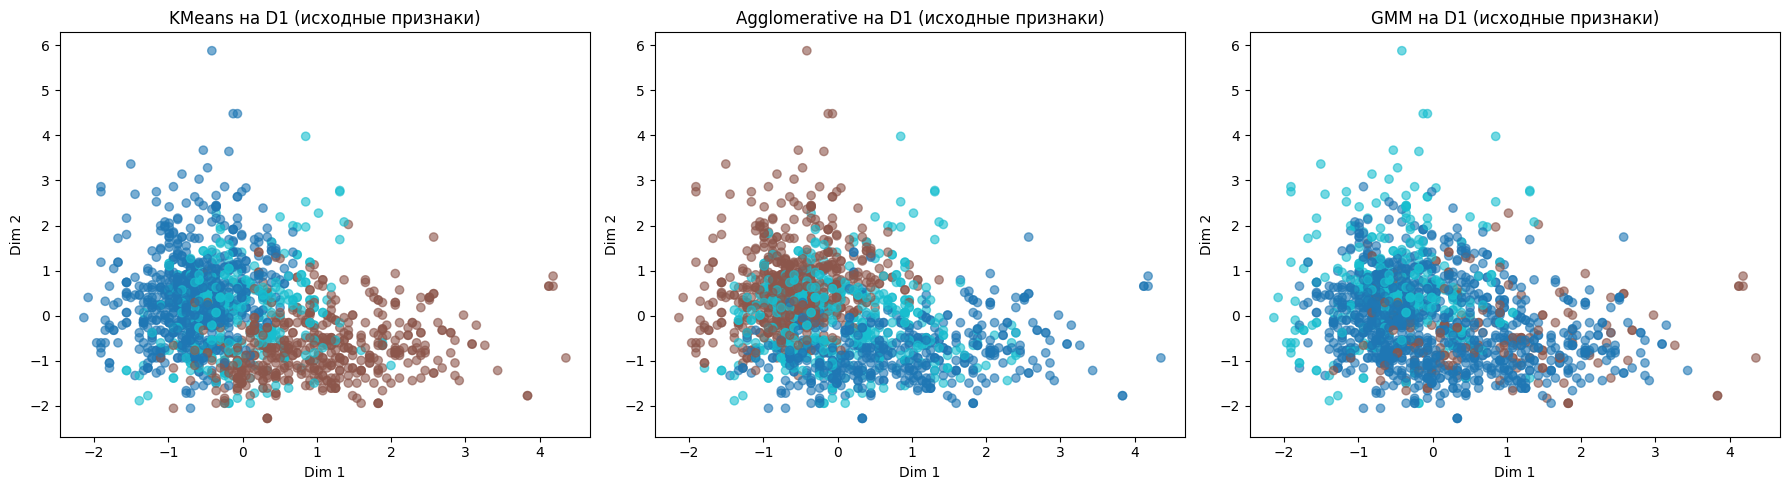


##### Кластеризация и метрики для D2 (PCA): #####

KMeans: кластеров = 3
  Silhouette Score: 0.3782
  Calinski-Harabasz Score: 1144.61
  Davies-Bouldin Score: 0.90

Agglomerative: кластеров = 3
  Silhouette Score: 0.3325
  Calinski-Harabasz Score: 916.36
  Davies-Bouldin Score: 0.95

GMM: кластеров = 3
  Silhouette Score: 0.3751
  Calinski-Harabasz Score: 910.19
  Davies-Bouldin Score: 0.91


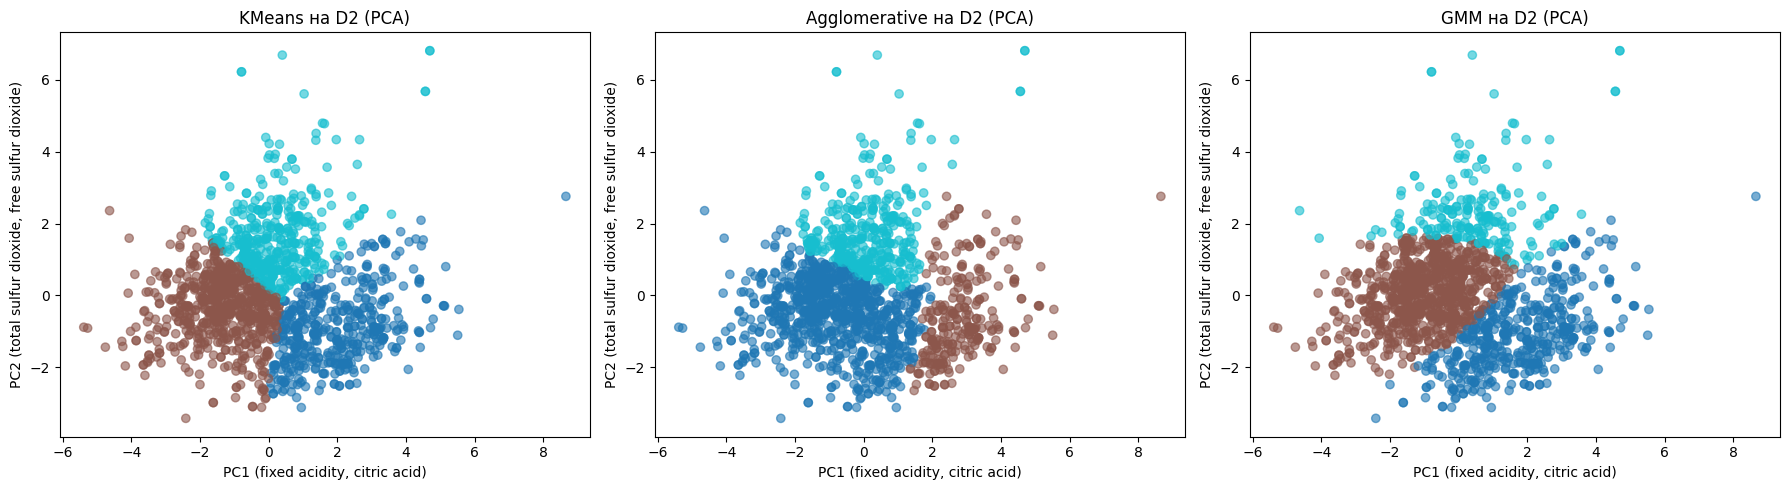


##### Кластеризация и метрики для D3 (t-SNE): #####

KMeans: кластеров = 3
  Silhouette Score: 0.4121
  Calinski-Harabasz Score: 1498.66
  Davies-Bouldin Score: 0.85

Agglomerative: кластеров = 3
  Silhouette Score: 0.3462
  Calinski-Harabasz Score: 1127.69
  Davies-Bouldin Score: 1.01

GMM: кластеров = 3
  Silhouette Score: 0.4125
  Calinski-Harabasz Score: 1484.68
  Davies-Bouldin Score: 0.82


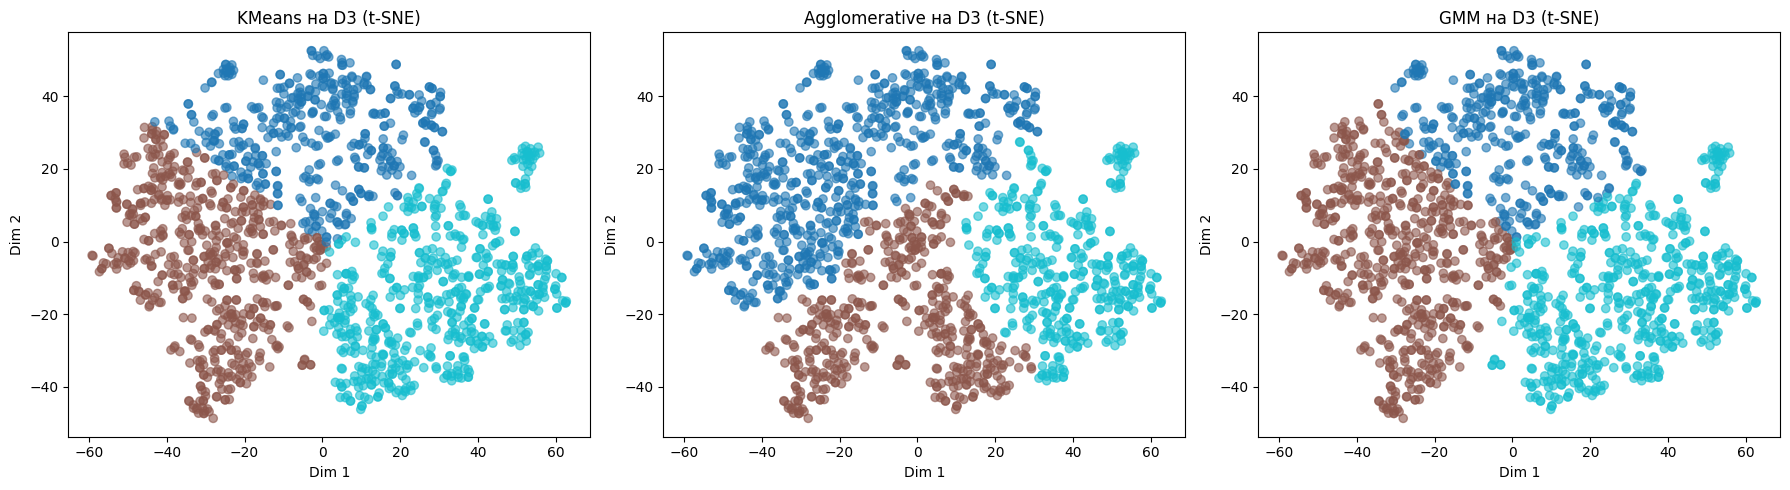

In [9]:
# === Шаг 5. Кластеризация и визуализация результатов по каждому датасету ===
datasets = [
    ("D1 (исходные признаки)", D1_scaled), 
    ("D2 (PCA)", D2), 
    ("D3 (t-SNE)", D3)
]

for dname, dset in datasets:
    cluster_and_evaluate(dset, dname)

    models = {
        "KMeans": KMeans(n_clusters=3, random_state=42),
        "Agglomerative": AgglomerativeClustering(n_clusters=3),
        "GMM": GaussianMixture(n_components=3, random_state=42)
    }

    plt.figure(figsize=(18, 5))
    for i, (mname, model) in enumerate(models.items(), 1):
        labels = model.fit_predict(dset)
        xlabel, ylabel = 'Dim 1', 'Dim 2'
        if dname == "D2 (PCA)":
            xlabel = f"PC1 ({', '.join(pc1_feats)})"
            ylabel = f"PC2 ({', '.join(pc2_feats)})"

        plt.subplot(1, 3, i)
        plot_clusters(dset, labels, f"{mname} на {dname}", xlabel=xlabel, ylabel=ylabel)
    plt.tight_layout()
    plt.show()